In [18]:
## This is the Third task of Machine Learning internship at CODSOFT, where we have to create a ML model that can predict the customer churn for a subscription based sevice using algorithms like Logistic regressioregression, Random Forests etc

In [21]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Step 1: Load the Data Set
### In this first step we will load the dataset for revision of churns followed by training and testing.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import os


In [6]:
churn_data=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')


In [8]:
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# EDA #

In [9]:
df=churn_data.copy()
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
churn_data.size
churn_data.shape

(10000, 14)

In [12]:
newrep = pd.concat((df.isnull().sum(),df.nunique(),df.dtypes), axis=1, keys=['Null count','cardinality','Data Type'])
display(newrep.T)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Null count,0,0,0,0,0,0,0,0,0,0,0
cardinality,460,3,2,70,11,6382,4,2,2,9999,2
Data Type,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64


In [13]:
num_columns = df.select_dtypes(include=['number']).columns
corr_result = df[num_columns].corrwith(df['Exited']).drop(index='Exited').sort_values(ascending=False) * 100
print(corr_result)

Age                28.532304
Balance            11.853277
EstimatedSalary     1.209686
HasCrCard          -0.713777
Tenure             -1.400061
CreditScore        -2.709354
NumOfProducts      -4.781986
IsActiveMember    -15.612828
dtype: float64


In [15]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

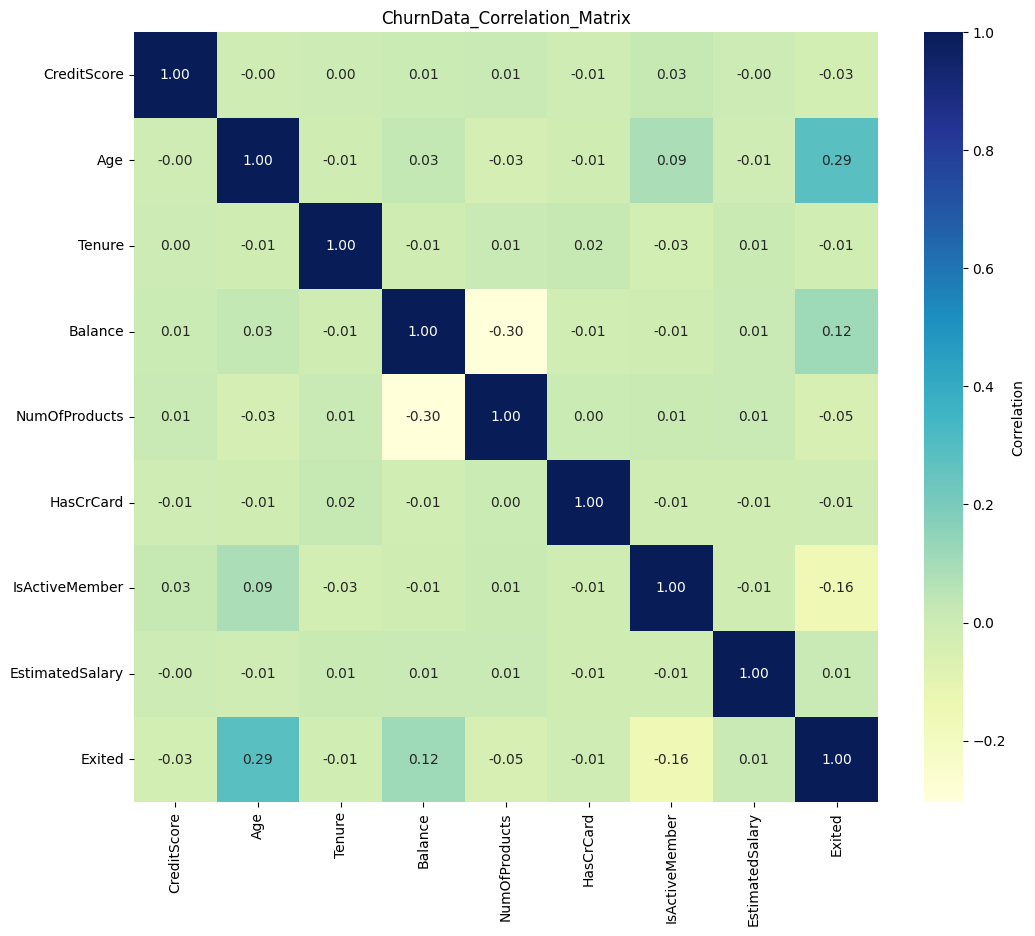

In [24]:
num_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df[num_columns].corr(), annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Correlation'})
plt.title('ChurnData_Correlation_Matrix')
plt.show()

In [25]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [28]:
gender_ratio = {'Female':0, 'Male':1}
geography_ratio = {'France':0, 'Germany':1, 'Spain':2}
df.Gender = df.Gender.map(gender_ratio)
df.Geography = df.Geography.map(geography_ratio)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


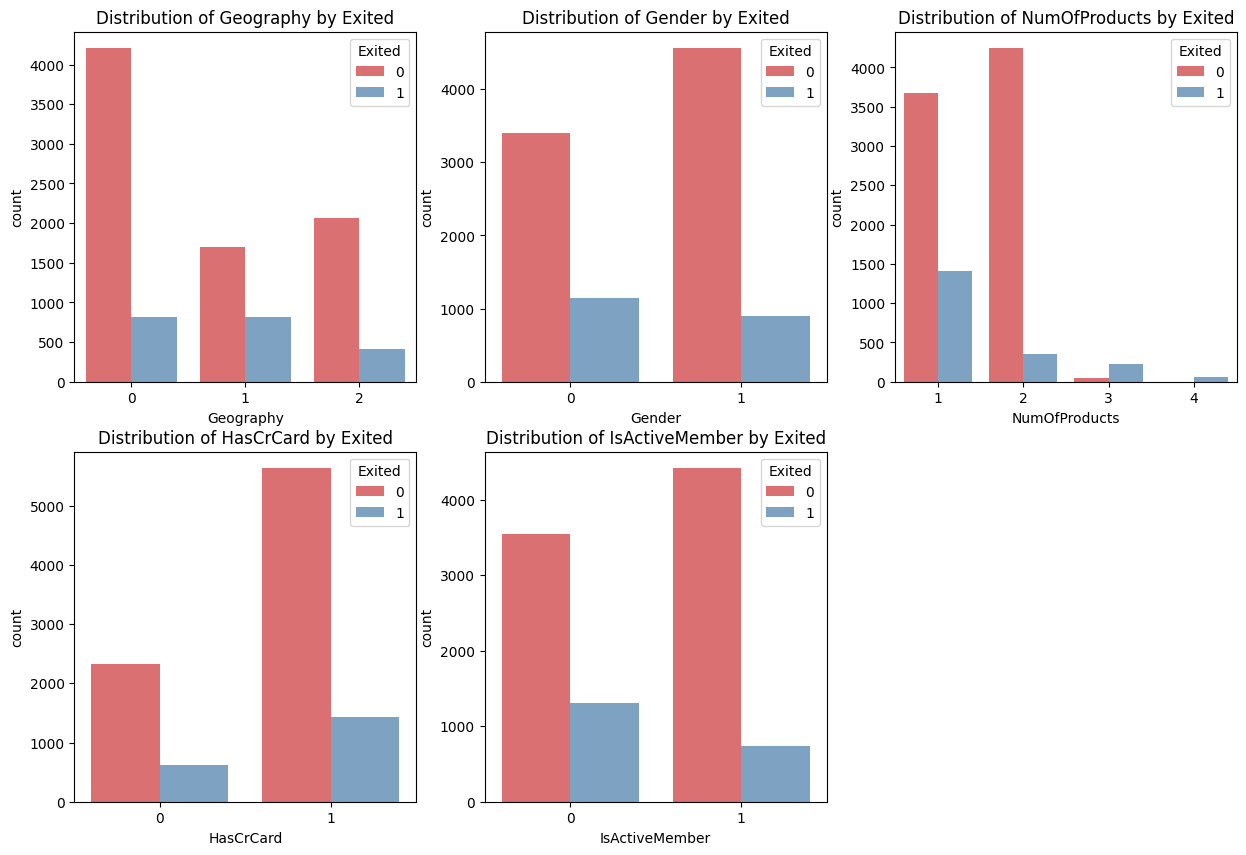

In [30]:
credit_value = df.columns[df.nunique() < 10].tolist()
credit_value.pop()

plt.figure(figsize=(15, 10))
i = 1
for factor in credit_value:
    plt.subplot(2, 3, i)
    sns.countplot(x=factor, hue='Exited', data=df, palette='Set1', alpha=0.7)
    plt.title(f'Distribution of {factor} by Exited')
    i += 1

plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']).values, df.Exited.values,test_size=0.2, random_state=42)
     

In [42]:
def result_grid(x_train, y_train, x_test, y_test):
    model_param_grid={
        'Logistic Regression':(LogisticRegression(max_iter=10000),{'C': [0.01, 0.1, 1, 10.0],
                                                                   'solver': ['liblinear','lbfgs','newton-cg']}),
        'KNN':(KNeighborsClassifier(),{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]}),
        'Decision Tree':(DecisionTreeClassifier(max_depth=10),{'criterion': ['gini','entropy'], 'splitter':['best','random'],
                                                  'max_depth':[10,50,100,150,200,250,300,350,400]}),
        'Random Forest':(RandomForestClassifier(),{'n_estimators':[50,100,150,200]})
    }

    results=[]

    for name, (model,parameters) in model_param_grid.items():
        grid=GridSearchCV(model,parameters)

        print(f"Tuning for {name}")

        st=time.time()

        grid.fit(x_train,y_train) 
        y_pred=grid.predict(x_test) 
        acc=accuracy_score(y_test,y_pred) 
        en=time.time()
        net_time=en-st
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best obtined score for {name}: {grid.best_score_*100:.3f}%")
        print(f"Running time for {name}:{net_time:.3f}s")
        results.append([name,grid.best_params_,grid.best_score_*100,net_time])
        print('-'*100)
        print()
    outcome_df=pd.DataFrame(results, columns=['model_name','best_parameters','best_test_score','running_time'])
    outcome_df=outcome_df.style.highlight_max(subset=['best_test_score'], color = 'lightyellow')
    outcome_df=outcome_df.highlight_min(subset=['best_test_score'], color = 'blue')
    outcome_df=outcome_df.highlight_max(subset=['running_time'], color = 'blue')
    outcome_df=outcome_df.highlight_min(subset=['running_time'], color = 'lightyellow')
    return outcome_df
churn_desire  = result_grid(x_train, y_train, x_test, y_test)
churn_desire

Tuning for Logistic Regression
Best hyperparameters for Logistic Regression: {'C': 10.0, 'solver': 'newton-cg'}
Best obtined score for Logistic Regression: 80.625%
Running time for Logistic Regression:33.776s
----------------------------------------------------------------------------------------------------

Tuning for KNN
Best hyperparameters for KNN: {'n_neighbors': 31}
Best obtined score for KNN: 79.450%
Running time for KNN:4.776s
----------------------------------------------------------------------------------------------------

Tuning for Decision Tree
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best obtined score for Decision Tree: 84.237%
Running time for Decision Tree:4.894s
----------------------------------------------------------------------------------------------------

Tuning for Random Forest
Best hyperparameters for Random Forest: {'n_estimators': 100}
Best obtined score for Random Forest: 86.112%
Running time 

,model_name,best_parameters,best_test_score,running_time
0,Logistic Regression,"{'C': 10.0, 'solver': 'newton-cg'}",80.625000,33.775813
1,KNN,{'n_neighbors': 31},79.450000,4.775997
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}",84.237500,4.894468
3,Random Forest,{'n_estimators': 100},86.112500,27.813841


In [43]:
# Task Completed